In [2]:
import gc
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import mlxtend.preprocessing
import mlxtend.frequent_patterns

In [3]:
ls

market_basket_analysis.ipynb  online_retail.xlsx


In [6]:
df=pd.read_excel('online_retail.xlsx')

In [60]:
df.shape

(525461, 9)

In [76]:
#To check if there is any integer/string value in a specific column
df['Description'].map(type).eq(int).any()

False

In [61]:
#Converting a column in the dataframe as string
df['Description']=df['Description'].astype(str)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Is_C_Present
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0


In [63]:
'''
Create an indicator column stipulating whether the invoice number begins with 'C'
'''

df['Is_C_Present'] = (
    df['Invoice']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0))



In [64]:
'''
Filter out all transactions having either zero or a negative number of items.
Remove all invoice numbers starting with 'C' (using columns 'Is_C_Present').
Subset the dataframe down to 'InvoiceNo' and 'Descritpion'.
Drop all rows with at least one missing value.
'''


df_clean = (
    df
    # filter out non-positive quantity values
    .loc[df["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[df['Is_C_Present'] != 1]
    # column filtering
    .loc[:, ["Invoice", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)


In [66]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=df_clean.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=df_clean.Invoice.nunique())
)

Data dimension (row count, col count): (513134, 2)
Count of unique invoice numbers: 22103


In [67]:
'''
Transform the data into a list of lists called invoice_item_list

'''

invoice_item_list = []
for num in list(set(df_clean.Invoice.tolist())):
    # filter data set down to one invoice number
    tmp_df = df_clean.loc[df_clean['Invoice'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:3])


[['TOY TIDY SPACEBOY  ', 'TOY TIDY DOLLY GIRL DESIGN', 'TOY TIDY PINK RETROSPOT  ', 'RECYCLING BAG RETROSPOT ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG DOLLY GIRL DESIGN', 'LUNCH BAG CARS BLUE', 'LUNCH BAG SUKI  DESIGN ', 'CHILDS BREAKFAST SET DOLLY GIRL ', 'CHILDS BREAKFAST SET SPACEBOY ', 'BAKING SET SPACEBOY DESIGN', 'BAKING SET 9 PIECE RETROSPOT ', 'PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN WOODLAND ANIMALS', 'VINTAGE HEADS AND TAILS CARD GAME ', 'VINTAGE SNAP CARDS'], ['NATURAL SLATE RECTANGLE CHALKBOARD', 'SLATE TILE NATURAL HANGING', 'NATURAL SLATE HEART CHALKBOARD ', 'BLUE POLKADOT WASHING UP GLOVES', 'RETROSPOT TEA SET CERAMIC 11 PC ', 'HEART OF WICKER LARGE', 'GIN AND TONIC MUG', 'WHITE JEWELLED HEART DECORATION', 'YELLOW METAL CHICKEN HEART ', 'ZINC FOLKART SLEIGH BELLS', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED WOOLLY HOTTIE WHITE HEART.', 'PACK OF 12 PINK POLKADOT TISSUES', 'PACK OF 12 RED RETROSPOT TIS

In [69]:
# Initialize and fit the transaction encoder
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)



In [70]:
# Recast the encoded array as a dataframe
online_encoder_df = pd.DataFrame(online_encoder_array, columns=online_encoder.columns_)

# Print the results
online_encoder_df


,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,eurobargain invc/credit,found,found again,mailout,mailout addition,nan,temp,tk maxx mix up with pink,update,wrong invc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
'''
Run the Apriori Algorithm with min_support = 0.01 (by default 0.5)
'''

apriori_model = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.01)
apriori_model


,support,itemsets
0,0.010451,(20)
1,0.010994,(27)
2,0.013166,(31)
3,0.014704,(40)
4,0.016649,(43)
...,...,...
996,0.012849,"(4065, 4027, 4358)"
997,0.014161,"(4438, 4443, 4358)"
998,0.010180,"(4425, 4420, 4438)"
999,0.010632,"(4443, 4420, 4438)"


In [72]:
'''
Run the same model again, but this time with use_colnames=True.
This will replace the numerical designations with the actual item names.
'''

apriori_model_colnames = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)

apriori_model_colnames

,support,itemsets
0,0.010451,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.010994,( WHITE CHERRY LIGHTS)
2,0.013166,(10 COLOUR SPACEBOY PEN)
3,0.014704,(12 PENCIL SMALL TUBE WOODLAND)
4,0.016649,(12 PENCILS SMALL TUBE RED SPOTTY)
...,...,...
996,0.012849,"(WHITE HANGING HEART T-LIGHT HOLDER, STRAWBERR..."
997,0.014161,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."
998,0.010180,"(WOODEN FRAME ANTIQUE WHITE , WOOD 2 DRAWER CA..."
999,0.010632,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA..."


In [77]:
'''
Add an additional column to the output of apriori_model_colnames that contains the size of the item set.
This will help with filtering and further analysis. 
'''

apriori_model_colnames['length'] = (
    apriori_model_colnames['itemsets'].apply(lambda x: len(x))
)

apriori_model_colnames

,support,itemsets,length
0,0.010451,( SET 2 TEA TOWELS I LOVE LONDON ),1
1,0.010994,( WHITE CHERRY LIGHTS),1
2,0.013166,(10 COLOUR SPACEBOY PEN),1
3,0.014704,(12 PENCIL SMALL TUBE WOODLAND),1
4,0.016649,(12 PENCILS SMALL TUBE RED SPOTTY),1
...,...,...,...
996,0.012849,"(WHITE HANGING HEART T-LIGHT HOLDER, STRAWBERR...",3
997,0.014161,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...",3
998,0.010180,"(WOODEN FRAME ANTIQUE WHITE , WOOD 2 DRAWER CA...",3
999,0.010632,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA...",3


In [78]:
apriori_model_colnames[
    (apriori_model_colnames['length'] == 2) & 
    (apriori_model_colnames['support'] >= 0.02) &
    (apriori_model_colnames['support'] < 0.021)
]


,support,itemsets,length
823,0.020495,"(JUMBO STORAGE BAG SUKI, JUMBO BAG STRAWBERRY)",2
848,0.020812,"(WHITE HANGING HEART T-LIGHT HOLDER, LOVE BUIL...",2
852,0.020314,"(LUNCH BAG RED SPOTTY, LUNCH BAG BLACK SKULL.)",2
968,0.020088,"(VINTAGE SNAP CARDS, VINTAGE HEADS AND TAILS C...",2
975,0.020676,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG...",2


Text(0.5, 1.0, 'Support')

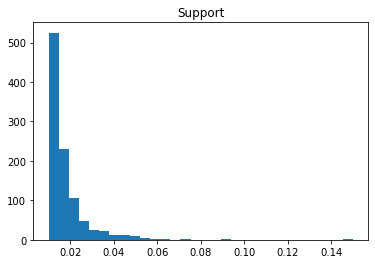

In [79]:
apriori_model_colnames.hist("support", grid=False, bins=30)
plt.title("Support")

In [80]:
'''
Generate derive association rules for the online retail dataset.
Here we use confidence as the measure of interestingness.
Set the minimum threshold to 0.6.
Return all metrics, not just support.
'''

rules = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.016152,0.015699,0.010451,0.647059,41.215969,0.010198,2.788852,0.991756
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.015699,0.016152,0.010451,0.665706,41.215969,0.010198,2.943064,0.991300
2,(PAINTED METAL PEARS ASSORTED),(ASSORTED COLOUR BIRD ORNAMENT),0.017328,0.063928,0.012713,0.733681,11.476689,0.011605,3.514859,0.928964
3,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN),0.018550,0.033118,0.013437,0.724390,21.873221,0.012823,3.508157,0.972318
4,(TOILET METAL SIGN),(BATHROOM METAL SIGN),0.023571,0.033118,0.017283,0.733205,22.139397,0.016502,3.624070,0.977882
...,...,...,...,...,...,...,...,...,...,...
68,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...",(WOODEN FRAME ANTIQUE WHITE ),0.016333,0.051577,0.010180,0.623269,12.084305,0.009337,2.517506,0.932478
69,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA...",(WOODEN FRAME ANTIQUE WHITE ),0.013075,0.051577,0.010632,0.813149,15.765814,0.009958,5.075821,0.948980
70,"(WOODEN FRAME ANTIQUE WHITE , WOOD 2 DRAWER CA...",(WOODEN PICTURE FRAME WHITE FINISH),0.013799,0.042845,0.010632,0.770492,17.983295,0.010041,4.170462,0.957607
71,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C...",(WOODEN FRAME ANTIQUE WHITE ),0.012170,0.051577,0.010361,0.851301,16.505534,0.009733,6.378147,0.950988


In [81]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 73


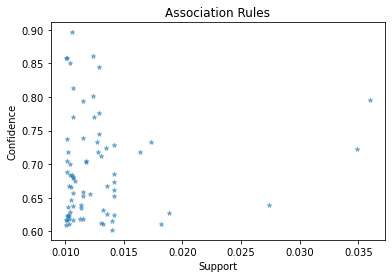

In [82]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()
